In [8]:
import json
from qutip import *
import numpy as np
import scipy
import cmath
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import itertools
from numpy.random import seed
from numpy.random import rand
from itertools import product
from scipy.misc import derivative
from scipy import optimize
from functools import wraps
from time import time
from scipy.optimize import minimize
from matplotlib import gridspec


In [24]:
engErr = []
stateErr = []
time = []
lengths = []


In [25]:
for i in range(3):
    for j in range(10):
        N = i+2
        M = j + 1
        dataLocation = 'Data/06-08-20/OneRunN'+ str(N) +'M' +str(M) +'.json'
        saved = []
        with open(dataLocation) as file:
            for line in file:
                saved.append(json.loads(line))

        cgdTime,cgdEngErr,cgdStateErr,edTime,length = saved
        engErr.append(cgdEngErr)
        stateErr.append(cgdStateErr)
        time.append(cgdTime)
        lengths.append(length)
        

In [26]:
    for j in range(9):
        N = 5
        M = j + 1
        dataLocation = 'Data/06-08-20/OneRunN'+ str(N) +'M' +str(M) +'.json'
        saved = []
        with open(dataLocation) as file:
            for line in file:
                saved.append(json.loads(line))

        cgdTime,cgdEngErr,cgdStateErr,edTime,length = saved
        engErr.append(cgdEngErr)
        stateErr.append(cgdStateErr)
        time.append(cgdTime)
        lengths.append(length)

In [53]:
dataLocation = 'Data/06-11-20/NetKetN2M2.json'
saved = []
with open(dataLocation) as file:
    for line in file:
        saved.append(json.loads(line))
nkEngErr, nkRunTime = saved

dataLocation = 'Data/06-11-20/RandomN2M2.json'
saved = []
with open(dataLocation) as file:
    for line in file:
        saved.append(json.loads(line))
ranEngErr = saved


In [45]:
print(len(nkEngErr))

RandomN2M2

50


View One Histogram

Text(0, 0.5, 'Runtime')

<Figure size 576x396 with 0 Axes>

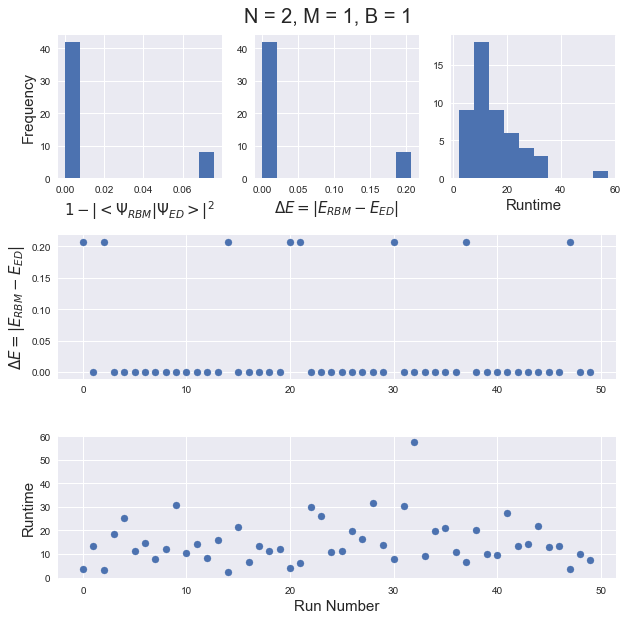

In [14]:

index = 2

hisIt= np.arange(lengths[index])
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("N = 2, M = 1, B = 1",size =20)
gs = gridspec.GridSpec(ncols=3, nrows=3, hspace = 0.4)
ttl.set_position([.5, 0.92])



ax1 = plt.subplot(gs[0, 0])
ax1 .hist(stateErr[index], bins=10) 
ax1 .set_xlabel("$1-|<\Psi_{RBM}|\Psi_{ED}>|^2$",size = 15)
ax1.set_ylabel("Frequency",size = 15)



ax2 = plt.subplot(gs[0, 1])
ax2.hist(engErr[index], bins=10) 
ax2.set_xlabel("$\Delta E = |E_{RBM}-E_{ED}|$",size = 15)



ax3 = plt.subplot(gs[0, 2])
ax3.hist(time[index], bins=10) 
ax3.set_xlabel("Runtime",size = 15)


ax4 = plt.subplot(gs[1, :])
ax4.scatter(hisIt,engErr[index]) 
#ax4.set_ylim([-0.000005,0.000005])
ax4 .set_ylabel("$\Delta E = |E_{RBM}-E_{ED}|$", size = 15)


ax5 = plt.subplot(gs[2, :])
ax5.scatter(hisIt,time[index])  
ax5.set_xlabel("Run Number",size = 15)
ax5 .set_ylabel("Runtime", size = 15)












In [15]:
avEngErr = np.sum(engErr[index])/(lengths[index])
avStateErr = np.sum(stateErr[index])/(lengths[index])
avRunTime = np.sum(time[index])/(lengths[index])
print('Average Energy Error: ', avEngErr )
print('Average Ground State Error: ', avStateErr )
print('Average Run Time: ', avRunTime )

cutOff = 0.0005
runsCutOff = sum(i>cutOff for i in engErr[index])
print("Number of runs abover 0.0001 error:", runsCutOff )






Average Energy Error:  0.03314231164995226
Average Ground State Error:  0.012182736627392408
Average Run Time:  15.071763415336608
Number of runs abover 0.0001 error: 8


Calculate Averages

In [27]:
avEngErr = []
avStateErr = []
avRunTime = []
numFailure = []
numFailureErr = []
for i in range(len(engErr)):
    avEngErrTemp = np.sum(engErr[i])/(lengths[i])
    avEngErr.append(avEngErrTemp)
    avStateErrTemp = np.sum(stateErr[i])/(lengths[i])
    avStateErr.append(avStateErrTemp)
    avRunTimeTemp = np.sum(time[i])/(lengths[i])
    avRunTime.append(avRunTimeTemp)
    
    cutOff = 0.0005
    runsCutOff = sum(i>cutOff for i in engErr[i])
    numFailure.append(runsCutOff)
    numFailureErr.append(runsCutOff**(0.5))

In [28]:
print(numFailure[37])
print(numFailureErr[35])

12
4.0


<Figure size 576x396 with 0 Axes>

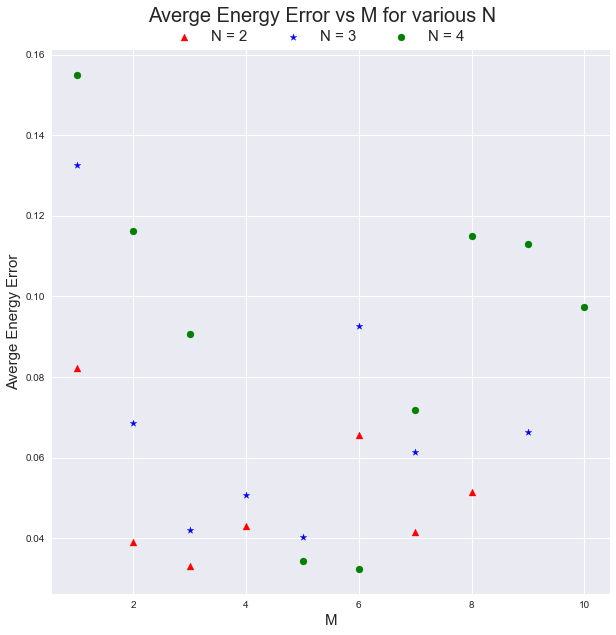

In [29]:
x = np.arange(1,11)
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Energy Error vs M for various N",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.94])


ax4 = plt.subplot(gs[0, :])
#ax4.set_yscale('log')
#ax4.set_ylim([-0.00001,0.0001])
ax4.scatter(x,avEngErr[0:10], color='r',label='N = 2', marker= '^') 
ax4.scatter(x,avEngErr[10:20],color='b',label='N = 3', marker = '*') 
ax4.scatter(x,avEngErr[20:30], color='g',label='N = 4') 
#ax4.scatter(x4,avEngErr[30:36], color='black',label='N = 5', marker = '>') 
ax4 .set_ylabel("Averge Energy Error", size = 15)
ax4.set_xlabel("M",size = 15)
plt.legend(loc = (0.2, 1),fontsize = 15,ncol=4)

Text(0.5, 0, 'M')

<Figure size 576x396 with 0 Axes>

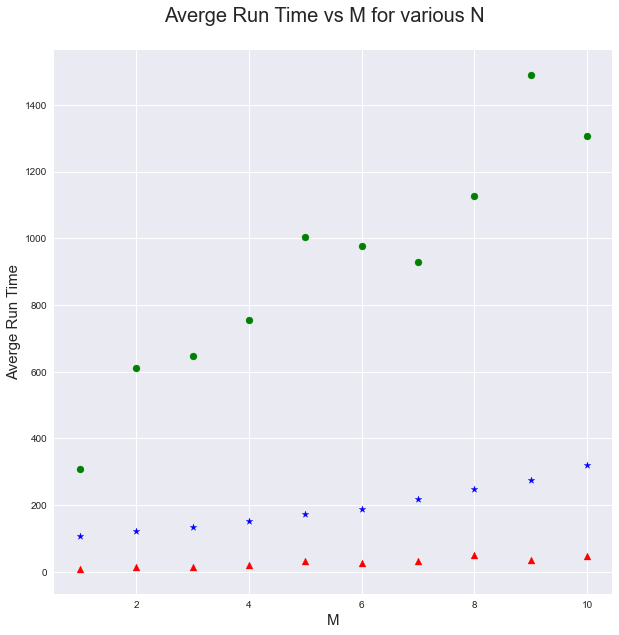

In [30]:
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Run Time vs M for various N",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.94])


ax4 = plt.subplot(gs[0, :])
#ax4.set_yscale('log')
#ax4.set_ylim([-0.001,0.01])
ax4.scatter(x,avRunTime[0:10], color='r',label='N = 2', marker= '^') 
ax4.scatter(x,avRunTime[10:20],color='b',label='N = 3', marker = '*') 
ax4.scatter(x,avRunTime[20:30], color='g',label='N = 4') 
ax4.scatter(x4,avRunTime[30:38], color='black',label='N = 5', marker = '>')
ax4 .set_ylabel("Averge Run Time", size = 15)
ax4.set_xlabel("M",size = 15)
#plt.legend(loc = (0.1, 1),fontsize = 15,ncol=4)

In [31]:
ns = np.arange(2,6)
nsM1 = np.arange(2,7)
avRunTimeM1 = []
avRunTimeM2 = []
avRunTimeM3 = []
avRunTimeM4 = []
avRunTimeM5 = []

for i in range(4):
    avRunTimeM1.append(avRunTime[i*10])
    avRunTimeM2.append(avRunTime[i*10+1])
    avRunTimeM3.append(avRunTime[i*10+2])
    avRunTimeM4.append(avRunTime[i*10+3])
    avRunTimeM5.append(avRunTime[i*10+4])

    

<Figure size 576x396 with 0 Axes>

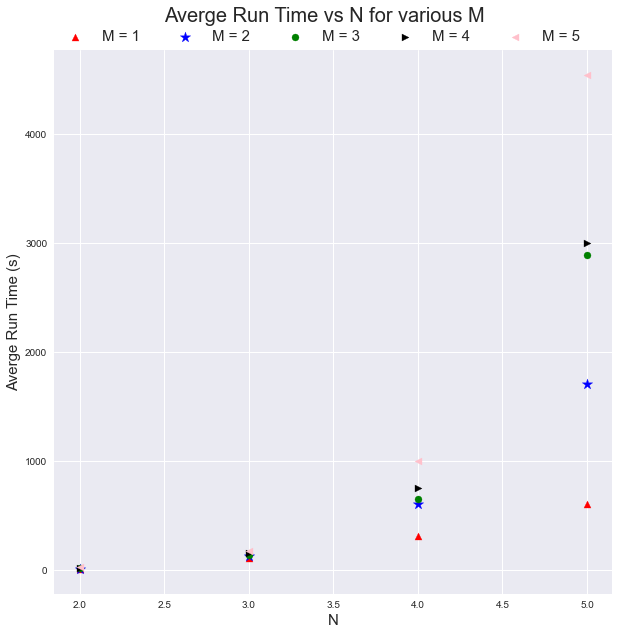

In [34]:
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Run Time vs N for various M",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.94])


ax4 = plt.subplot(gs[0, :])
#ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylim([-0.001,0.01])
#ax4.set_xlim([1,10])
ax4.scatter(ns,avRunTimeM1, color='r',label='M = 1', marker= '^') 
ax4.scatter(ns,avRunTimeM2,color='b',label='M = 2', marker = '*', s=120) 
ax4.scatter(ns,avRunTimeM3, color='g',label='M = 3') 
ax4.scatter(ns,avRunTimeM4, color='black',label='M = 4', marker = '>')
ax4.scatter(ns,avRunTimeM5, color='pink',label='M = 5', marker = '<')
#ax4.scatter(ns,avRunTimeM6, color='cyan',label='M = 6', marker = 'v')
ax4 .set_ylabel("Averge Run Time (s)", size = 15)
ax4.set_xlabel("N",size = 15)
plt.legend(loc = (0, 1),fontsize = 15,ncol=6)

Text(0.5, 0, 'M')

<Figure size 576x396 with 0 Axes>

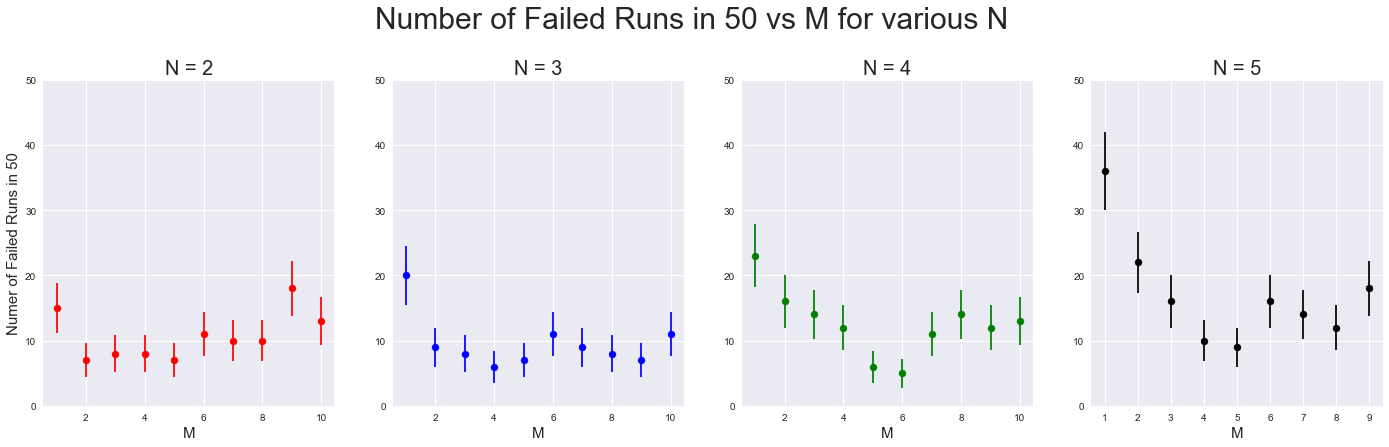

In [33]:
x = np.arange(1,11)
xShort = np.arange(1,10)
plt.figure(constrained_layout=True)
plt.figure(figsize=(24,6))
ttl = plt.suptitle("Number of Failed Runs in 50 vs M for various N",size =30)
gs = gridspec.GridSpec(ncols=4, nrows=1, hspace = 0.01)
ttl.set_position([.5, 1.05])

ymin, ymax = 0,50


ax2 = plt.subplot(gs[0, 0])
ax2.set_title("N = 2",size =20)
ax2.set_ylim([ymin, ymax])
ax2.scatter(x,numFailure[0:10], color='r',label='N = 2', s=50) 
ax2.errorbar(x,numFailure[0:10],yerr=numFailureErr[0:10], linestyle="None", color = 'red')
ax2 .set_ylabel("Numer of Failed Runs in 50", size = 15)
ax2.set_xlabel("M",size = 15)


ax3 = plt.subplot(gs[0, 1])
ax3.set_title("N = 3",size =20)
ax3.set_ylim([ymin, ymax])
ax3.scatter(x,numFailure[10:20], color='b',label='N = 3', s=50) 
ax3.errorbar(x,numFailure[10:20],yerr=numFailureErr[10:20], linestyle="None", color = 'b')
ax3.set_xlabel("M",size = 15)

ax4 = plt.subplot(gs[0, 2])
ax4.set_title("N = 4",size =20)
ax4.set_ylim([ymin, ymax])
ax4.scatter(x,numFailure[20:30], color='g',label='N = 4', s=50) 
ax4.errorbar(x,numFailure[20:30],yerr=numFailureErr[20:30], linestyle="None", color = 'g')
ax4.set_xlabel("M",size = 15)

ax5 = plt.subplot(gs[0, 3])
ax5.set_title("N = 5",size =20)
ax5.set_ylim([ymin, ymax])
ax5.scatter(xShort,numFailure[30:39], color='black',label='N = 5', s=50) 
ax5.errorbar(xShort,numFailure[30:39],yerr=numFailureErr[30:39], linestyle="None", color = 'black')
ax5.set_xlabel("M",size = 15)


NameError: name 'edTimeNumpy' is not defined

<Figure size 576x396 with 0 Axes>

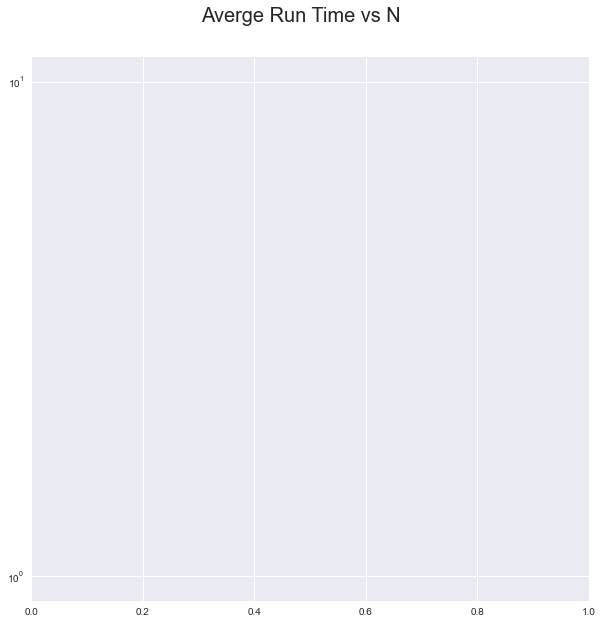

In [23]:

n = np.arange(2,13)

plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Run Time vs N",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.95])


ax4 = plt.subplot(gs[0, :])
ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylim([-0.001,0.01])
#ax4.set_xlim([1,10])
#ax4.scatter(n,edTime, label='Qutip Groundstate Function') 
ax4.scatter(n,edTimeNumpy, color = 'red', label= 'Exact Digonalization')
ax4.scatter(ns,avRunTimeM1, color='b',label='RBM M = 1', marker = '<')
ax4 .set_ylabel("Averge Run Time", size = 15)
ax4.set_xlabel("N",size = 15)



plt.legend(loc = (0.1, 1),fontsize = 15,ncol=3)

Text(0, 0.5, 'Runtime (s)')

<Figure size 576x396 with 0 Axes>

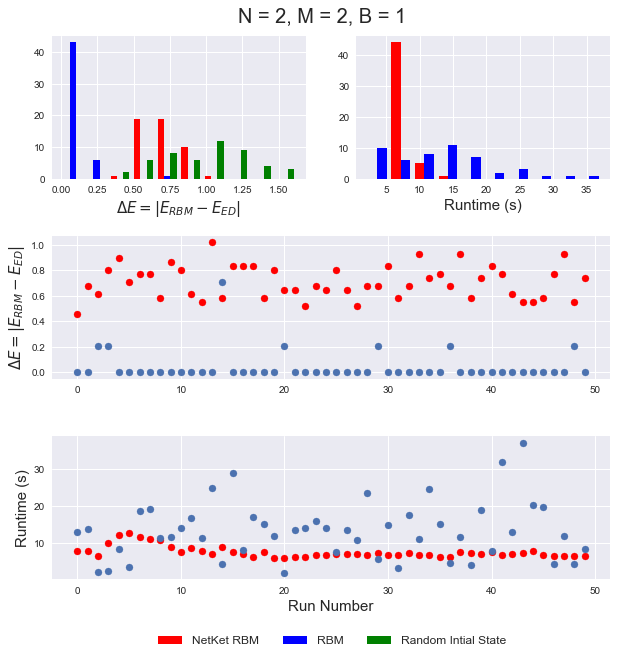

In [80]:
index = 1

allEngErr = [nkEngErr,engErr[index],ranEngErr]
allRunTime = [nkRunTime,time[index]]

labels = ['NetKet RBM', 'RBM', 'Random Intial State']
colors = ['red','blue']

hisIt= np.arange(len(nkEngErr))
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("N = 2, M = 2, B = 1",size =20)
gs = gridspec.GridSpec(ncols=2, nrows=3, hspace = 0.4)
ttl.set_position([.5, 0.92])





ax2 = plt.subplot(gs[0, 0])
ax2.hist(allEngErr, bins=10, color = ['red','blue','green'], label=labels)
ax2.set_xlabel("$\Delta E = |E_{RBM}-E_{ED}|$",size = 15)





ax3 = plt.subplot(gs[0, 1])
ax3.hist(allRunTime, bins=10, color = colors) 
ax3.set_xlabel("Runtime (s)",size = 15)



ax4 = plt.subplot(gs[1, :])
ax4.scatter(hisIt,nkEngErr, color = 'red') 
ax4.scatter(hisIt,engErr[index]) 
#ax4.set_ylim([-0.000005,0.000005])
ax4 .set_ylabel("$\Delta E = |E_{RBM}-E_{ED}|$", size = 15)


ax2.legend(labels, loc = (0.4, -3.3),fontsize = 12,ncol=3)

ax5 = plt.subplot(gs[2, :])
ax5.scatter(hisIt,nkRunTime, color = 'red')  
ax5.scatter(hisIt,time[index]) 
ax5.set_xlabel("Run Number",size = 15)
ax5 .set_ylabel("Runtime (s)", size = 15)










